# Fraud Detection Day 7 Model: K-Mean

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from scipy import stats
get_ipython().magic(u'config IPCompleter.greedy=True')

from sklearn import preprocessing
from sklearn.cluster import KMeans

## 1. Importing Features Data for Day 7

In [4]:
# Import day 35 features data 
df = pd.read_csv(
    "/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_35.tsv", sep="\t")

In [5]:
df.head()

,systemid,acceptestimate,accesstokencreated,activateclient,activateestimate,activateexpense,activateinvoice,activateotherincome,activatepayment,activateproject,...,avg_wc_description_day_35,avg_wc_notes_day_35,avg_wc_terms_day_35,avg_wc_address_day_35,invoice_count_day_35,client_count_day_35,is_freshbooks_account_active,is_paying,base_subscription_amount_first_upgrade,upgrade_ever
0,3592461,0,0,0,0,0,0,0,0,0,...,2.0,6.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
1,3592463,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,3592465,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,3592467,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,3592469,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [6]:
df.shape

(452565, 234)

## 2. K-Mean Clustering
### 2.1 Normalize the data

In [7]:
# Finding the features columns varinaces
df_nosystemid = df.drop('systemid', axis=1)

In [8]:
df_nosystemid.head()

,acceptestimate,accesstokencreated,activateclient,activateestimate,activateexpense,activateinvoice,activateotherincome,activatepayment,activateproject,activaterecurringprofile,...,avg_wc_description_day_35,avg_wc_notes_day_35,avg_wc_terms_day_35,avg_wc_address_day_35,invoice_count_day_35,client_count_day_35,is_freshbooks_account_active,is_paying,base_subscription_amount_first_upgrade,upgrade_ever
0,0,0,0,0,0,0,0,0,0,0,...,2.0,6.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### 2.2 Analyzing variance of each feature

In [9]:
# Analyzing variance of each feature
df_var = pd.DataFrame(df_nosystemid.var().sort_values())

In [10]:
df_var.to_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_v1/features_var_day_35.tsv", sep="\t")

In [11]:
df_var.tail()

,0
client_count_day_35,2238.070845
createjournalentry,4494.521338
createbanktransaction,11120.110054
createexpense,21051.713338
api,21711.104339


### 2.3 Feature column normalization

In [12]:
# Normalize the columns
df_normalized = (df_nosystemid - df_nosystemid.min()) / (df_nosystemid.max() - df_nosystemid.min())

In [13]:
df_normalized.fillna(0, inplace=True)

### 2.2 Determining K value using elbow method

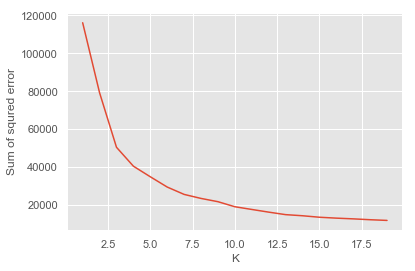

In [14]:
# Determine the K value (using elbow method)
k_rng = range(1,20)
sse = []
for k in k_rng:
    kmean = KMeans(n_clusters=k)
    kmean.fit(df_normalized)
    sse.append(kmean.inertia_)
    
# Plot the K vs. SSE plot 
plt.xlabel('K')
plt.ylabel('Sum of squred error')
plt.plot(k_rng, sse)

In [15]:
# Inverse elbow plot to determine the optimal K value
# from scipy.cluster.vq import kmeans
# from scipy.spatial.distance import cdist,pdist

# # Inverse elbow plot
# K_MAX = 15
# KK = range(1,K_MAX+1)

# KM = [kmeans(df_normalized,k) for k in KK]
# centroids = [cent for (cent,var) in KM]
# D_k = [cdist(df_normalized, cent, 'euclidean') for cent in centroids]
# cIdx = [np.argmin(D,axis=1) for D in D_k]
# dist = [np.min(D,axis=1) for D in D_k]

# tot_withinss = [sum(d**2) for d in dist]  # Total within-cluster sum of squares
# totss = sum(pdist(df_normalized)**2)/df_normalized.shape[0]       # The total sum of squares
# betweenss = totss - tot_withinss          # The between-cluster sum of squares

# # elbow curve
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(KK, betweenss/totss*100, 'o-')
# ax.set_ylim((0,100))
# plt.grid(True)
# plt.xlabel('Number of clusters')
# plt.ylabel('Percentage of variance explained (%)')
# plt.title('Elbow for KMeans clustering')

### 2.3 Fitting K-mean clustering

In [15]:
# K Mean clustering
kmean = KMeans(n_clusters=7)
cluster_fit = kmean.fit_predict(df_normalized)

In [16]:
cluster_fit

array([3, 6, 2, ..., 0, 6, 2], dtype=int32)

In [17]:
len(cluster_fit)

452565

In [18]:
# The cluster centers
kmean.cluster_centers_

array([[ 5.29886485e-04,  2.80494378e-04,  9.61274258e-06, ...,
         3.54735722e-05,  3.47010366e-06,  5.20279059e-04],
       [ 5.70575291e-03,  1.28761390e-03,  1.27103598e-04, ...,
         9.99245520e-01,  2.07300065e-02,  9.99937127e-01],
       [ 4.18247043e-06,  1.06491704e-04,  5.15823691e-08, ...,
         7.16994926e-06,  1.34107928e-07,  2.15098480e-05],
       ...,
       [ 3.94417476e-03,  9.99769831e-04,  2.53477143e-04, ...,
        -1.45716772e-15,  1.22873565e-02,  1.00000000e+00],
       [ 4.88634255e-04,  2.80991922e-04,  1.07704474e-05, ...,
         4.32640035e-14,  1.19879337e-07,  1.91934896e-05],
       [ 6.69083752e-05,  1.82811999e-04,  2.19915540e-06, ...,
        -4.40064651e-14,  3.38411277e-07,  3.86940002e-05]])

In [19]:
# Adding the clusters labels as a column
df['cluster_id'] = cluster_fit

In [20]:
df.head()

,systemid,acceptestimate,accesstokencreated,activateclient,activateestimate,activateexpense,activateinvoice,activateotherincome,activatepayment,activateproject,...,avg_wc_notes_day_35,avg_wc_terms_day_35,avg_wc_address_day_35,invoice_count_day_35,client_count_day_35,is_freshbooks_account_active,is_paying,base_subscription_amount_first_upgrade,upgrade_ever,cluster_id
0,3592461,0,0,0,0,0,0,0,0,0,...,6.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,3
1,3592463,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6
2,3592465,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
3,3592467,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
4,3592469,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2


In [21]:
# Getting only 'systemid' and their corresponding 'cluster_id'
df_clf = df[['systemid', 'cluster_id']]

In [22]:
df_clf.tail()

,systemid,cluster_id
452560,4502186,2
452561,4502188,2
452562,4502190,0
452563,4502192,6
452564,4502194,2


In [35]:
# Separating 'systemid' according to 'cluster_id'
df_c0 = df_clf[df_clf.cluster_id == 0]
df_c1 = df_clf[df_clf.cluster_id == 1]
df_c2 = df_clf[df_clf.cluster_id == 2]
df_c3 = df_clf[df_clf.cluster_id == 3]
df_c4 = df_clf[df_clf.cluster_id == 4]
df_c5 = df_clf[df_clf.cluster_id == 5]
df_c6 = df_clf[df_clf.cluster_id == 6]

In [36]:
# Export Cluster's systemid
df_c0.to_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/cluster_00_accounts_kmean_day_35.tsv", sep="\t")
df_c1.to_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/cluster_01_accounts_kmean_day_35.tsv", sep="\t")
df_c2.to_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/cluster_02_accounts_kmean_day_35.tsv", sep="\t")
df_c3.to_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/cluster_03_accounts_kmean_day_35.tsv", sep="\t")
df_c4.to_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/cluster_04_accounts_kmean_day_35.tsv", sep="\t")
df_c5.to_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/cluster_05_accounts_kmean_day_35.tsv", sep="\t")
df_c6.to_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/cluster_06_accounts_kmean_day_35.tsv", sep="\t")


## 3. Analyzing identified clusters 

In [37]:
# Accounts list (systemid) in each cluster
c0_systemid_list = list(df_c0['systemid'])
c1_systemid_list = list(df_c1['systemid'])
c2_systemid_list = list(df_c2['systemid'])
c3_systemid_list = list(df_c3['systemid'])
c4_systemid_list = list(df_c4['systemid'])
c5_systemid_list = list(df_c5['systemid'])
c6_systemid_list = list(df_c6['systemid'])


In [26]:
# Checking
# len(c0_systemid_list)
# len(c1_systemid_list)
# len(c2_systemid_list)
# len(c3_systemid_list)
# len(c4_systemid_list)
# len(c5_systemid_list)


In [38]:
# Store and print cluster sizes 
cls_sizes = {'cluster_id': ['cluster 00', 'cluster 01', 'cluster 02', 'cluster 03', 'cluster 04', 'cluster 05', 'cluster 06'], 
             'size' : [df_c0.shape[0], df_c1.shape[0], df_c2.shape[0], df_c3.shape[0], df_c4.shape[0], df_c5.shape[0], df_c6.shape[0]]
            }
df_cls_sizes = pd.DataFrame(cls_sizes, columns =['cluster_id', 'size'])

In [39]:
df_cls_sizes

,cluster_id,size
0,cluster 00,84570
1,cluster 01,15905
2,cluster 02,139471
3,cluster 03,24913
4,cluster 04,6386
5,cluster 05,52101
6,cluster 06,129219


In [40]:
# Import fraud accounts list dated in last 12 months
fraud_accounts_12months = pd.read_csv(
    "/Users/dwahid/Documents/GitHub/fraud_detection/data_final/fraud_accounts_20180801_to_20190730.tsv", 
        sep="\t")

In [41]:
########################## Checking the number of fraud accounts exist in each Cluster ##########################

fraud_accounts_12months_list = list(fraud_accounts_12months['systemid'])

# Initialization: The number of fraud accounts in each clusters
fraud_accounts_num_c0 = 0
fraud_accounts_num_c1 = 0
fraud_accounts_num_c2 = 0
fraud_accounts_num_c3 = 0
fraud_accounts_num_c4 = 0
fraud_accounts_num_c5 = 0
fraud_accounts_num_c6 = 0

for systemid in fraud_accounts_12months_list:
    
    # checking in cluster 00
    if systemid in c0_systemid_list:
        #print('Exist Cluster 00')
        fraud_accounts_num_c0 += 1
        
    elif systemid in c1_systemid_list:
        #print('Exist Cluster 01')
        fraud_accounts_num_c1 += 1
        
    elif systemid in c2_systemid_list:
        #print('Exist Cluster 02')
        fraud_accounts_num_c2 += 1
        
    elif systemid in c3_systemid_list:
        #print('Exist Cluster 03')
        fraud_accounts_num_c3 += 1
        
    elif systemid in c4_systemid_list:
        #print('Exist Cluster 04')
        fraud_accounts_num_c4 += 1
        
    elif systemid in c5_systemid_list:
        #print('Exist Cluster 05')
        fraud_accounts_num_c5 += 1
        
    elif systemid in c6_systemid_list:
        #print('Exist Cluster 06')
        fraud_accounts_num_c6 += 1
    else:
        print('NOT')
        continue

In [42]:
# Store and print the number of existance of fraud accounts in each cluster
fraud_accounts_num = {'cluster_id': ['cluster 00', 'cluster 01', 'cluster 02', 'cluster 03', 'cluster 04', 'cluster 05', 'cluster 06'], 
             '#fraud_accounts' : [fraud_accounts_num_c0, fraud_accounts_num_c1, fraud_accounts_num_c2, fraud_accounts_num_c3, fraud_accounts_num_c4, fraud_accounts_num_c5, fraud_accounts_num_c6]
            }
df_cls_fraud_accounts_num = pd.DataFrame(fraud_accounts_num, columns =['cluster_id', '#fraud_accounts'])
        

In [43]:
df_cls_fraud_accounts_num

,cluster_id,#fraud_accounts
0,cluster 00,0
1,cluster 01,1
2,cluster 02,0
3,cluster 03,19
4,cluster 04,16
5,cluster 05,2
6,cluster 06,1
